In [0]:
from google.colab import drive
#!pip uninstall tensorflow
#!pip install tensorflow==2.0.0
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

In [0]:
normal = 'gdrive/My Drive/pneumonia/train/NORMAL/'
pneumonia = 'gdrive/My Drive/pneumonia/train/PNEUMONIA/'

In [7]:
label=[]
j=0
normal_image = []
for i in os.listdir(normal):
    j = j+1
    #if(j == 1000):
    #  break
    print(j)
    path = normal+str(i)
    img = cv.imread(path)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = cv.resize(img,(128,128))
    img_to_array = np.array(img)
    normal_image.append(img_to_array)
    del(img)
    del(img_to_array)
    label.append(0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
pneumonia_image = []
j = 0
for i in os.listdir(pneumonia):
  j = j+1
  if(j == 1341):
    break
  print(j)
  path = pneumonia+str(i)
  img = cv.imread(path)
  img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  img = cv.resize(img,(128,128))
  img_to_array = np.array(img)
  pneumonia_image.append(img_to_array)
  del(img)
  del(img_to_array)
  label.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
x = normal_image+pneumonia_image
y = label

Pneumonia_image->0


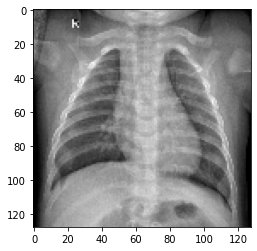

In [10]:
plt.imshow(x[0])
print('Pneumonia_image->'+str(y[0]))

In [0]:
x = np.array(x)
y = np.array(y)
x=x/255

In [0]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(3,3))
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(3,3))
cnn.add(Flatten())
cnn.add(Dense(124,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(16,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))
cnn.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:

cnn.fit(x,y,batch_size=10,epochs=5,validation_split=0.1,shuffle=True)

Train on 2412 samples, validate on 269 samples
Epoch 1/5
2412/2412 [==============================] - 40s 16ms/sample - loss: 0.6485 - accuracy: 0.5974 - val_loss: 0.9610 - val_accuracy: 0.2454
Epoch 2/5
2412/2412 [==============================] - 39s 16ms/sample - loss: 0.4568 - accuracy: 0.8246 - val_loss: 0.4487 - val_accuracy: 0.8364
Epoch 3/5
2412/2412 [==============================] - 39s 16ms/sample - loss: 0.3439 - accuracy: 0.8657 - val_loss: 0.1767 - val_accuracy: 0.9517
Epoch 4/5
2412/2412 [==============================] - 39s 16ms/sample - loss: 0.2758 - accuracy: 0.9055 - val_loss: 0.2130 - val_accuracy: 0.9108
Epoch 5/5
2412/2412 [==============================] - 39s 16ms/sample - loss: 0.2366 - accuracy: 0.9208 - val_loss: 0.4684 - val_accuracy: 0.7881


In [0]:
test_normal = 'gdrive/My Drive/pneumonia/test/NORMAL/'
test_pneumonia = 'gdrive/My Drive/pneumonia/test/PNEUMONIA/'
test_label=[]

In [28]:
test_label=[]
j=0
normal_image_test = []
for i in os.listdir(test_normal):
    j = j+1
    print(j)
    path = test_normal+str(i)
    img = cv.imread(path)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = cv.resize(img,(128,128))
    img_to_array = np.array(img)
    normal_image_test.append(img_to_array)
    del(img)
    del(img_to_array)
    test_label.append(0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


In [29]:
pneumonia_image_test = []
j = 0
for i in os.listdir(test_pneumonia):
  j = j+1
  print(j)
  path = test_pneumonia+str(i)
  img = cv.imread(path)
  img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  img = cv.resize(img,(128,128))
  img_to_array = np.array(img)
  pneumonia_image_test.append(img_to_array)
  del(img)
  del(img_to_array)
  test_label.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
test.count

AttributeError: ignored

In [0]:
test = []
test = normal_image_test+pneumonia_image_test
test = np.array(test)
test_label = np.array(test_label)
test = test/255
#test = tf.convert_to_tensor(test,dtype='float32')

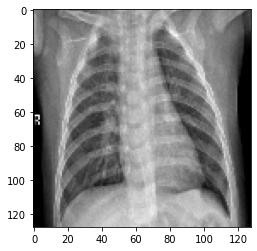

In [31]:
plt.imshow(test[0])
#test =np.array(test)

In [0]:
predict = cnn.predict(test)

In [58]:
test_label.shape

(624,)

In [59]:
predict.shape

(624, 1)

In [0]:
predict = np.reshape(predict,newshape=(624,))

In [61]:
predict

array([0.06551749, 0.08562112, 0.09868628, 0.8410028 , 0.12516013,
       0.11891559, 0.01953018, 0.07604891, 0.07653868, 0.0447363 ,
       0.04684168, 0.04911128, 0.9128456 , 0.09408954, 0.0469228 ,
       0.00902268, 0.02095094, 0.02685577, 0.03308579, 0.05671614,
       0.1627123 , 0.04787058, 0.47171196, 0.0344114 , 0.15644836,
       0.15373865, 0.18994087, 0.05424434, 0.0783689 , 0.10509187,
       0.02899867, 0.11174938, 0.2723635 , 0.14577016, 0.20420033,
       0.06605422, 0.10534891, 0.12603569, 0.04057676, 0.05515203,
       0.90064156, 0.06220746, 0.3145216 , 0.0152683 , 0.06157801,
       0.10081577, 0.01635167, 0.03293487, 0.1369988 , 0.09225336,
       0.4714773 , 0.06515151, 0.05605641, 0.07760367, 0.04608038,
       0.53246814, 0.03371122, 0.03856239, 0.08284375, 0.16772678,
       0.03268766, 0.33912623, 0.07509661, 0.09165695, 0.06536046,
       0.32633716, 0.11513537, 0.10859928, 0.2897874 , 0.04843459,
       0.0794751 , 0.06176838, 0.03774455, 0.9103652 , 0.03560

In [0]:
predict = np.round(predict)

In [63]:
confusion_matrix(test_label,predict)

array([[212,  22],
       [ 72, 318]])

In [0]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_true=test_label,y_pred=predict)
#More Accuracy can be achieved by using data augmentation technique

0.8493589743589743

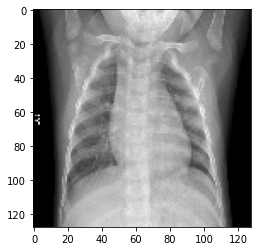

In [51]:
plt.imshow(x[4])

In [52]:
predict

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1.

In [53]:
pneumonia_image[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  4,   4,   4],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]]

In [0]:
label[0]